# Assignment 3
## Due May 14  at 14:00

Please do not chance any provided variable name. Read carefully the instructions in the exercise PDF and in this notebook. Add your solutions at `YOUR CODE HERE` and remove the corresponding `raise NotImplementedError()`.
Before submitting: Please make sure, that your notebook can be executed from top to bottom without an error (Menu -> Kernel -> Restart & Run all). 

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [2]:
from scipy.linalg import cho_factor, cho_solve

## Exercise 2

In [3]:
def get_data(n, seed=42):
    np.random.seed(seed)
    
    X = np.random.uniform(low=0, high=2, size=(n, 1))
    epsilon = np.random.normal(0, 2, (n, 1))
    y = 2 * np.sin(2 * X) + 0.1 * epsilon
    
    return X, y

In [4]:
xs, ys = get_data(100)
xs.shape, ys.shape

((100, 1), (100, 1))

### a)

<IPython.core.display.Javascript object>


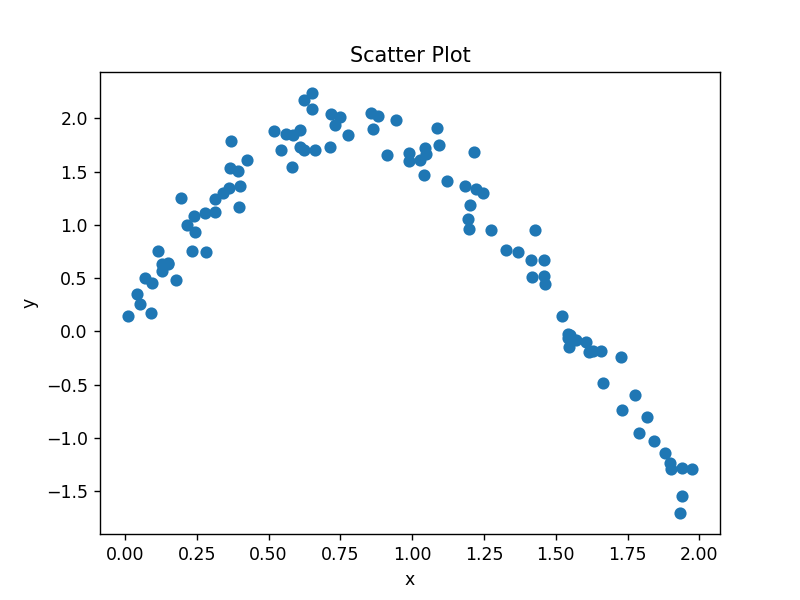

Text(0.5, 1.0, 'Scatter Plot')

In [5]:
# Create a new figure with new default axis
fig, axis = plt.subplots(1, 1)

# Plot here in axis
# YOUR CODE HERE
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')

In [6]:
# PLEASE LEAVE THIS CELL EMPTY

### b)

In [7]:
def ridge_regression(xs, ys, lam=1):
    n, d = xs.shape
    nugget = 1e-14 * np.eye(d)
    c, lower = cho_factor(xs.T @ xs + n * lam * np.eye(d) + nugget)
    w = cho_solve((c, lower), xs.T @ ys)
    return w


def lasso_regression(xs, ys, lam=1):
    # Tipp: You can use scipy.optimize.minimize
    # YOUR CODE HERE
    n, d = xs.shape
    w = np.zeros((d, 1))
    val = minimize(lambda w: (np.mean((ys - xs @ w)** 2)) + lam * np.sum(abs(w)), w, method = "BFGS")
    w = val.x
    return w

In [8]:
# PLEASE LEAVE THIS CELL EMPTY

### c)

$\lambda = \{0.1, 1, 10\}$

Ridge Regression:

In [9]:
lambdas = [0.1, 1, 10]
mse_per_lambda = [None, None, None]
ys_pred_per_lambda = [None, None, None]

for i, lam in enumerate(lambdas):
    # ridge regession
    w = ridge_regression(xs, ys, lam = lam)
    ys_pred = xs @ w
    mse = np.sum((ys_pred-ys)**2)/len(ys)

    ys_pred_per_lambda[i] = ys_pred
    mse_per_lambda[i] = mse
    
print(mse_per_lambda)

[1.515374499511039, 1.5449118191541356, 1.6347621031184643]


<IPython.core.display.Javascript object>


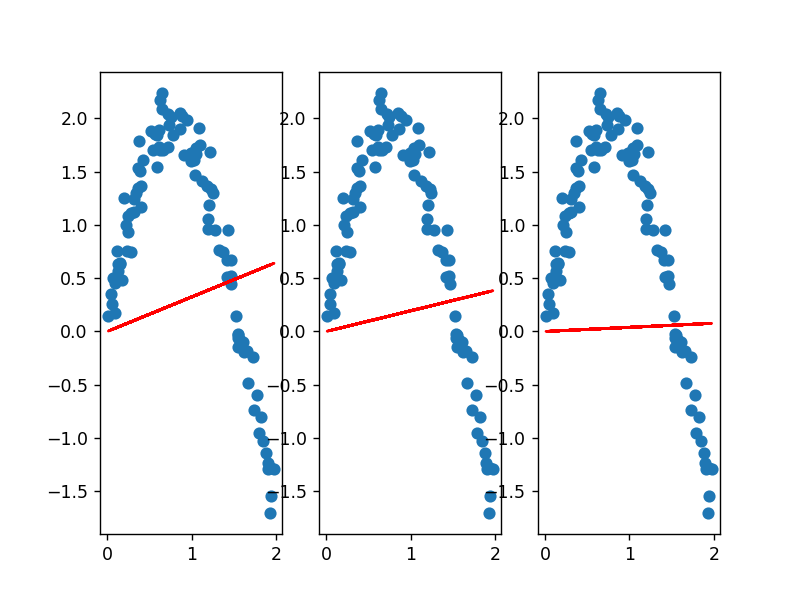

In [10]:
fig, axis = plt.subplots(1, 3)

for ax, ys_pred in zip(axis, ys_pred_per_lambda):
    plt.sca(ax)  # enable axis
    plt.scatter(xs,ys)
    plt.plot(xs, ys_pred,color='red')

In [11]:
# PLEASE LEAVE THIS CELL EMPTY

Lasso Regression:

[1.585016171727623, 1.5339732731343754, 1.666288141745631]


<IPython.core.display.Javascript object>


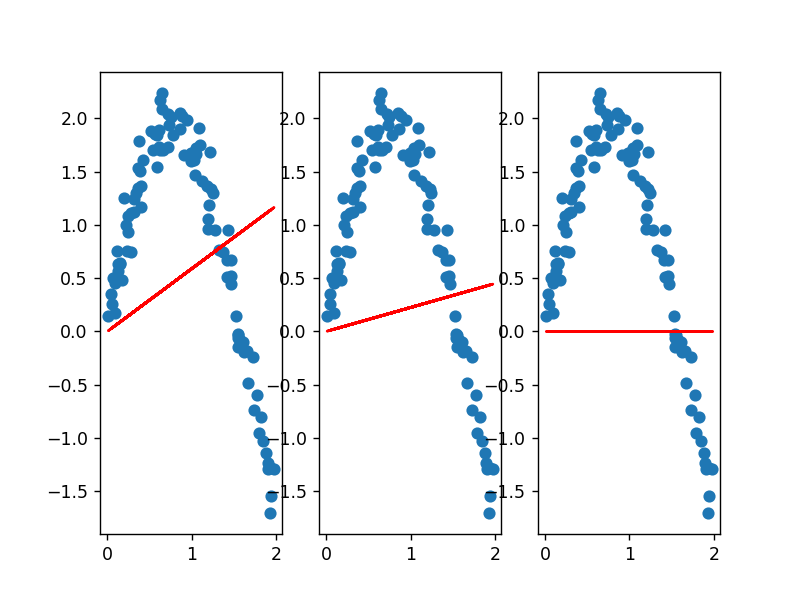

In [12]:
mse_per_lambda = [None, None, None]
ys_pred_per_lambda = [None, None, None]

for i, lam in enumerate(lambdas):
    # lasso regession
    # YOUR CODE HERE
    w = np.expand_dims(lasso_regression(xs, ys, lam = lam),0)
    ys_pred = xs @ w
    mse = np.sum((ys_pred-ys)**2)/len(ys)
    

    ys_pred_per_lambda[i] = ys_pred
    mse_per_lambda[i] = mse 
    
print(mse_per_lambda)


fig, axis = plt.subplots(1, 3)

for ax, ys_pred in zip(axis, ys_pred_per_lambda):
    plt.sca(ax)  # enable axis
    
    # First plot scatters, then the regression line
    # YOUR CODE HERE
    plt.scatter(xs,ys)
    plt.plot(xs, ys_pred,color='red')


In [13]:
# PLEASE LEAVE THIS CELL EMPTY

### d)

<IPython.core.display.Javascript object>


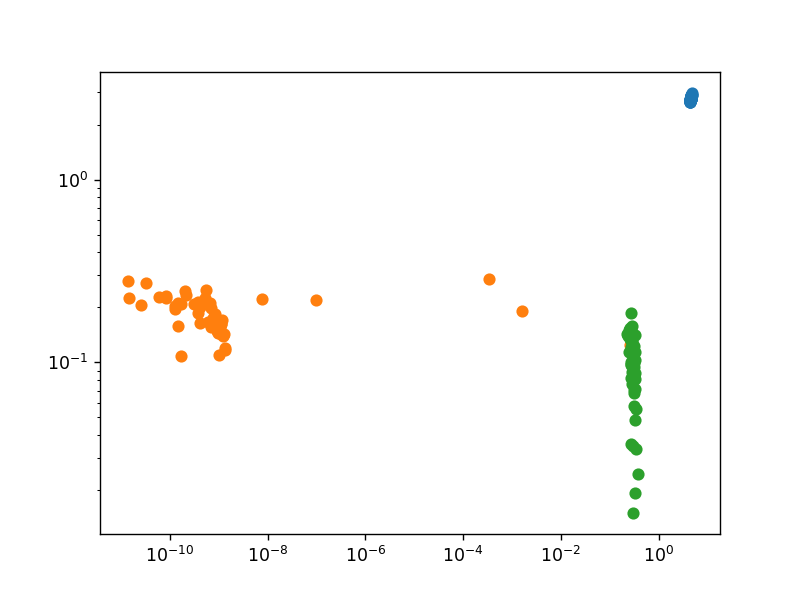

In [14]:
datasets = [(np.c_[xs, xs**2], ys) for xs, ys in
            (get_data(100, seed=seed) for seed in range(0, 100, 2))]

# Calculate the weights for ridge and lasso on all datasets.
# YOUR CODE HERE
ws_ridge = [None for i in range(len(datasets))]
ws_lasso = [None for i in range(len(datasets))]
ws_linear = [None for i in range(len(datasets))]

for i, dataset in enumerate(datasets):
    xs_, ys_ = dataset
    w_linear = ridge_regression(xs_, ys_, lam = 0)
    w_ridge = ridge_regression(xs_, ys_, lam = 1)
    w_lasso = lasso_regression(xs_, ys_, lam = 1)
    
    ws_linear[i] = w_linear
    ws_ridge[i] = w_ridge
    ws_lasso[i] = w_lasso

ws_abs_linear =  np.abs(np.array(ws_linear)[:, :, 0])
ws_abs_ridge = np.abs(np.array(ws_ridge)[:, :, 0])
ws_abs_lasso = np.abs(ws_lasso)

fig, axis = plt.subplots(1, 1)
plt.scatter(ws_abs_linear[:,0], ws_abs_linear[:,1])
plt.scatter(ws_abs_lasso[:,0], ws_abs_lasso[:,1])
plt.scatter(ws_abs_ridge[:,0], ws_abs_ridge[:,1])
plt.xscale("log")
plt.yscale("log")
# Scatter plot the absolute weight values
# use logarithmic axis scales and 
# set appropriate axis limits
# YOUR CODE HERE







In [ ]:
# PLEASE LEAVE THIS CELL EMPTY

### e)

Ridge regression

In [15]:
lambdas = [0.001, 0.01, 0.1, 1, 10]

def create_features_e(x):
    return np.hstack([np.ones((x.shape[0], 1)), x, x**2])

best_lambda = None
best_error = np.inf
xs_mod = create_features_e(xs)

for l in lambdas:
    w = ridge_regression(xs_mod, ys, lam = l)
    ys_pred = xs_mod @ w
    mse = np.sum((ys_pred - ys)** 2)/len(ys)
    
    if best_error > mse:
        best_error = mse
        best_lambda = l

print(f'best lambda: {best_lambda}')
print(f'mse: {best_error}')


best lambda: 0.001
mse: 0.048138817911103395


In [16]:
# PLEASE LEAVE THIS CELL EMPTY

<IPython.core.display.Javascript object>


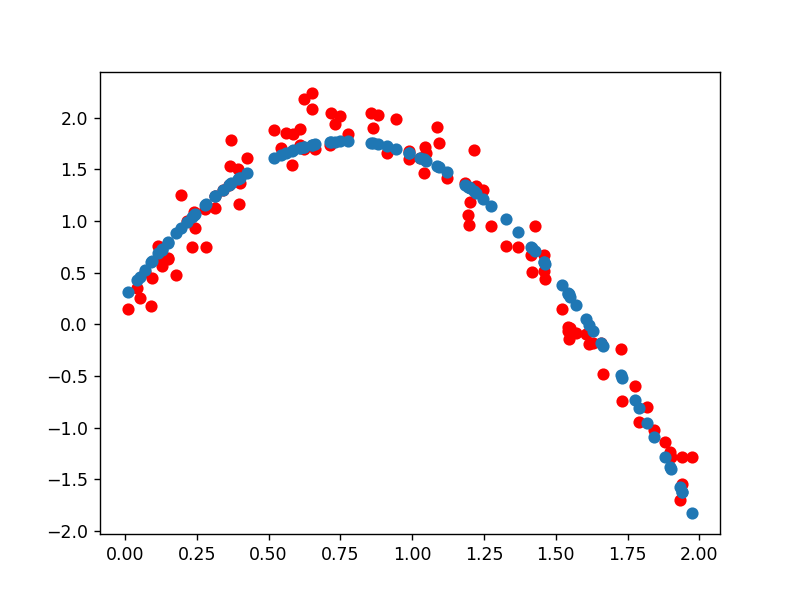

In [19]:
fig, axis = plt.subplots(1, 1)

# First plot scatters, then the regression line
# YOUR CODE HERE

w = ridge_regression(xs_mod, ys, lam=best_lambda)
ys_pred = xs_mod @ w


plt.scatter(xs, ys, color ='red')
plt.scatter(xs, ys_pred)

In [20]:
# PLEASE LEAVE THIS CELL EMPTY

Linear regresion

In [21]:
# YOUR CODE HERE
w = ridge_regression(xs_mod, ys, lam=0)
ys_pred = xs_mod @ w

mse = np.sum((ys_pred-ys)**2)/len(ys)

print(mse)

0.046979083181786264


<IPython.core.display.Javascript object>


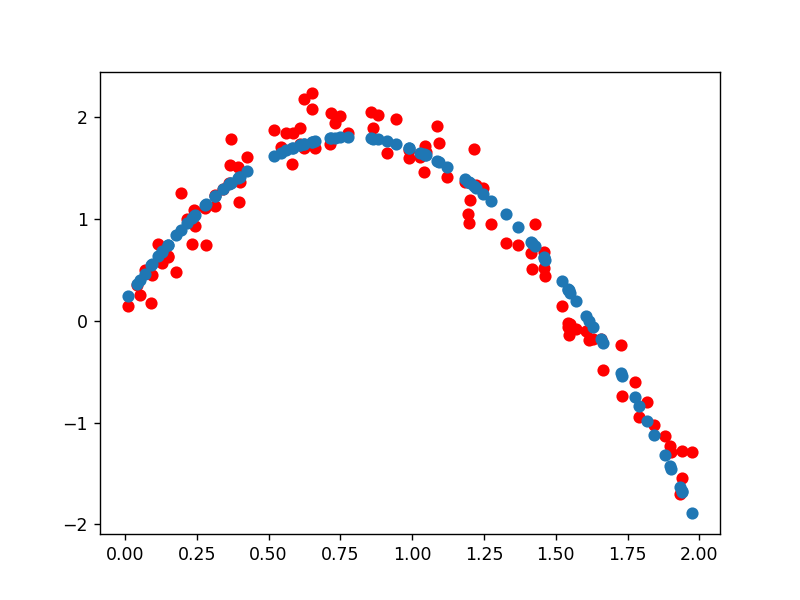

In [22]:
fig, axis = plt.subplots(1, 1)

# First plot scatters, then the regression line
# YOUR CODE HERE
plt.scatter(xs, ys, color ='red')
plt.scatter(xs, ys_pred)


In [23]:
# PLEASE LEAVE THIS CELL EMPTY

### f)

In [24]:
xs_test, ys_test = get_data(20, seed=420)

In [25]:
# Setup Omega, Omega_test, and lambdas
# YOUR CODE HERE
lambdas = [0.001, 0.01, 0.1, 0]

best_lambda = None
best_error = np.inf

In [26]:
errors = []
xs_test_mod = create_features_e(xs_test)
for l in lambdas:
    # YOUR CODE HERE
    
    w = ridge_regression(xs_mod, ys, lam=l)

    ys_pred = xs_test_mod @ w

    mse = np.sum((ys_pred-ys_test)**2)/len(ys_test)
    
    errors.append(mse)

    if best_error > mse:
        best_error = mse
        best_lambda = l
    
print(errors)

# YOUR CODE HERE
print(f'best lambda: {best_lambda}')

[0.037885921461156935, 0.07265758139290998, 0.26494962994433197, 0.038536203477847406]
best lambda: 0.001


In [27]:
# PLEASE LEAVE THIS CELL EMPTY

### g)

In [28]:
xs = np.random.uniform(0,2, (100, 2))
ys = 2 * (xs[:, 0]**2) + xs[:, 1] + 1 + 0.1 * np.random.normal(0, 1, 100)

In [29]:
# YOUR CODE HERE
# YOUR CODE HERE
lambdas = [0.001, 0.01, 0.1, 1, 10]

best_lambda = None
best_error = np.inf
mse = []

def create_features_g(x):
    return np.hstack([np.ones((x.shape[0], 1)), x[:,[0]], x[:,[0]] ** 2, x[:,[1]], x[:,[1]] ** 2, x[:,[0]] * x[:,[1]]])

xs_mod = create_features_g(xs)

for l in lambdas:
    w = ridge_regression(xs_mod, ys, lam=l)

    ys_pred = xs_mod @ w

    err = np.sum((ys_pred-ys)**2)/len(ys)

    mse.append(err)

    if best_error > err:
        best_error = err
        best_lambda = l
    
print(f'best lambda: {best_lambda}')
print(f'best error: {best_error}')

print(mse)

best lambda: 0.001
best error: 0.009197511692079639
[0.009197511692079639, 0.013999709234312801, 0.05940829346805897, 0.6142225995014794, 8.132934091377821]


In [30]:
# PLEASE LEAVE THIS CELL EMPTY

<IPython.core.display.Javascript object>


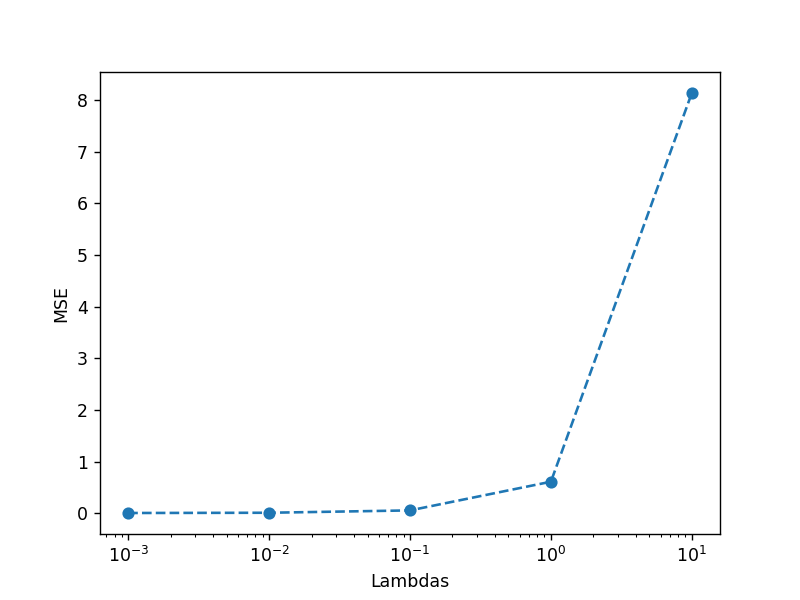

In [31]:
fig, axis = plt.subplots(1, 1)
lambdas = [0.001, 0.01, 0.1, 1, 10] 

# Plot line of mse as a function of lambda
# YOUR CODE HERE
plt.plot(lambdas, mse, '--o')
plt.xlabel('Lambdas')
plt.ylabel('MSE')
plt.xscale('log')

In [ ]:
# PLEASE LEAVE THIS CELL EMPTY